# Crop Recommendation System

## STEP1 : Installing Libraries

In [10]:
!pip install xgboost

In [11]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

## STEP2 : Data Loading

In [13]:
df = pd.read_csv('Crop_recommendationV21.CSV')

FileNotFoundError: [Errno 2] No such file or directory: 'Crop_recommendationV21.CSV'

## STEP3 : Exploratory Data Analysis (EDA)

In [ ]:
df.head()

In [5]:
df.size

50600

In [6]:
df.shape

(2200, 23)

In [7]:
df.isnull().sum()

N                         0
P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
soil_moisture             0
soil_type                 0
sunlight_exposure         0
wind_speed                0
co2_concentration         0
organic_matter            0
irrigation_frequency      0
crop_density              0
pest_pressure             0
fertilizer_usage          0
growth_stage              0
urban_area_proximity      0
water_source_type         0
frost_risk                0
water_usage_efficiency    0
dtype: int64

In [8]:
print(df.duplicated().sum())

0


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed',
       'co2_concentration', 'organic_matter', 'irrigation_frequency',
       'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage',
       'urban_area_proximity', 'water_source_type', 'frost_risk',
       'water_usage_efficiency'],
      dtype='object')

In [13]:
df.dtypes

N                           int64
P                           int64
K                           int64
temperature               float64
humidity                  float64
ph                        float64
rainfall                  float64
label                      object
soil_moisture             float64
soil_type                   int64
sunlight_exposure         float64
wind_speed                float64
co2_concentration         float64
organic_matter            float64
irrigation_frequency        int64
crop_density              float64
pest_pressure             float64
fertilizer_usage          float64
growth_stage                int64
urban_area_proximity      float64
water_source_type           int64
frost_risk                float64
water_usage_efficiency    float64
dtype: object

In [14]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [15]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,...,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,20.151388,1.991364,8.570609,...,5.465652,3.515000,12.344959,49.850701,125.846403,1.999545,24.801013,2.003636,50.304701,2.990268
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.793720,0.812263,1.999382,...,2.605294,1.697912,4.297494,28.886354,43.564527,0.818999,14.523975,0.812021,28.580352,1.139637
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.024260,1.000000,5.000710,...,1.003338,1.000000,5.004341,0.038103,50.209990,1.000000,0.017756,1.000000,0.054911,1.002106
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,15.179949,1.000000,6.904620,...,3.203903,2.000000,8.585734,24.379866,88.030737,1.000000,12.212594,1.000000,26.104674,2.051814
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,20.088481,2.000000,8.609968,...,5.418049,4.000000,12.303616,49.982421,126.441536,2.000000,24.922548,2.000000,50.171934,2.968675
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.255146,3.000000,10.220394,...,7.686417,5.000000,15.975567,74.681904,163.850536,3.000000,37.322761,3.000000,75.262676,3.968736
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,29.997860,3.000000,11.991041,...,9.999990,6.000000,19.988474,99.983849,199.982166,3.000000,49.992046,3.000000,99.957274,4.997130


## STEP4 : Data Preprocesing(Handling Outliers)

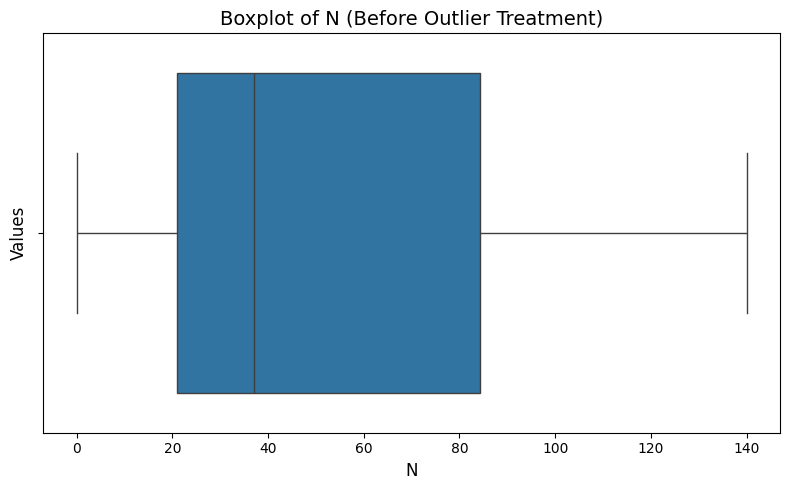

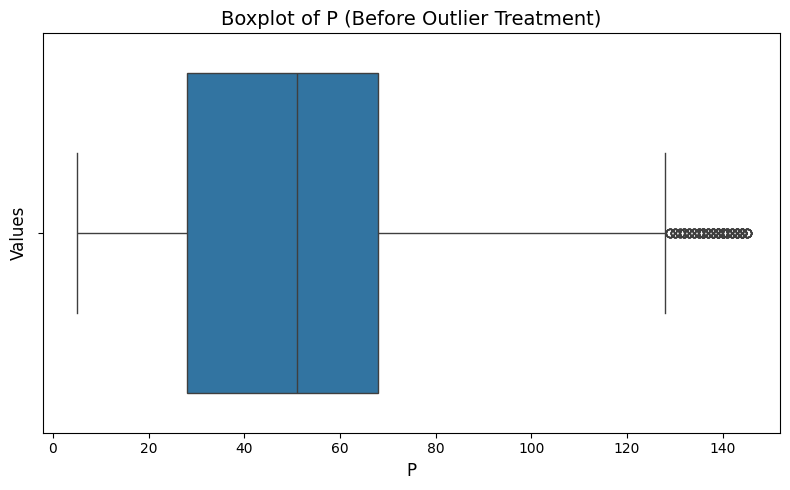

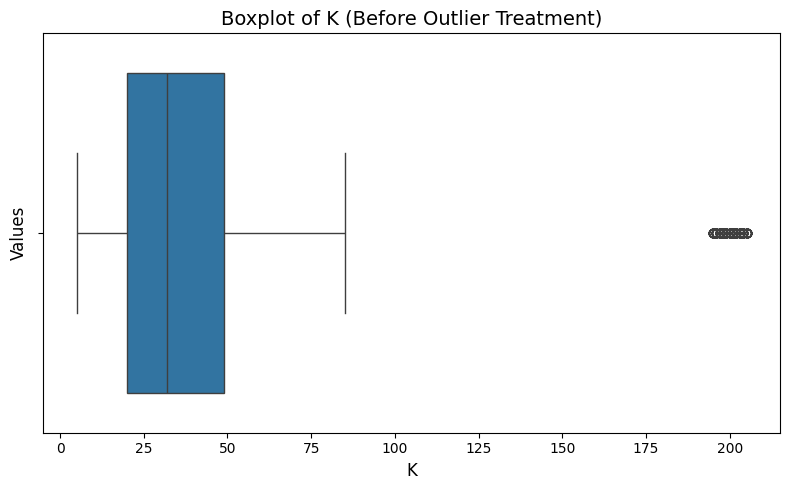

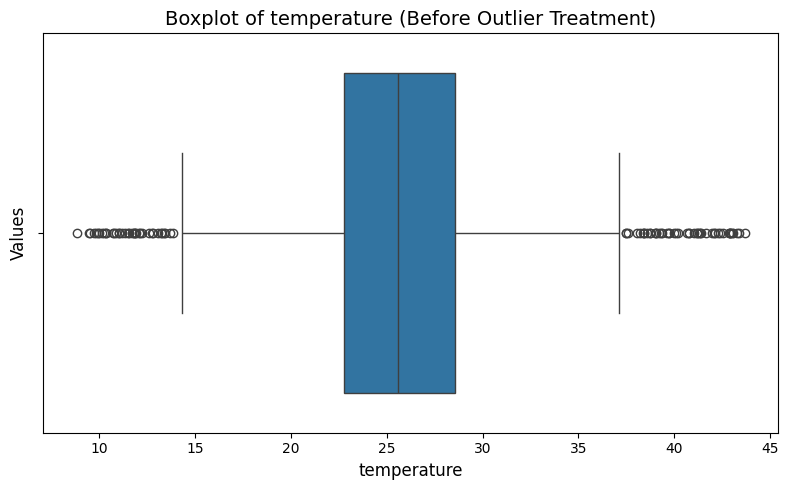

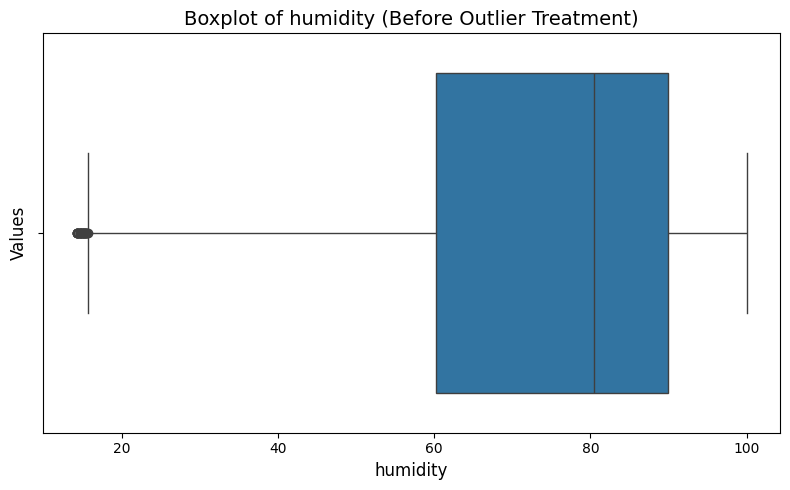

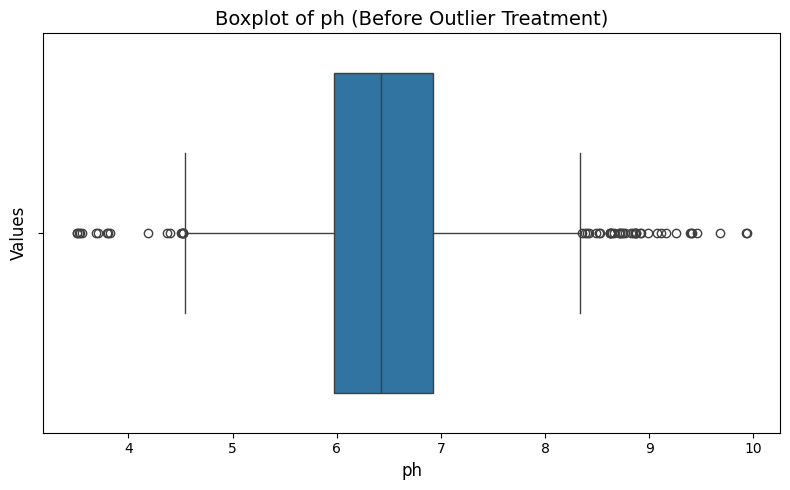

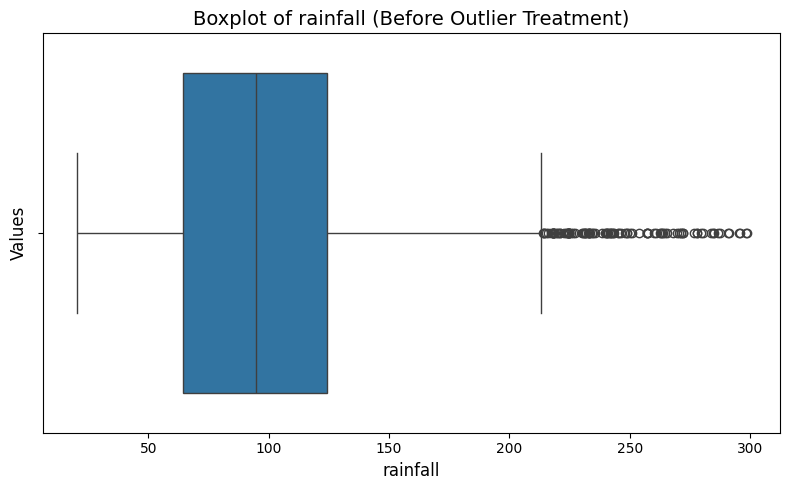

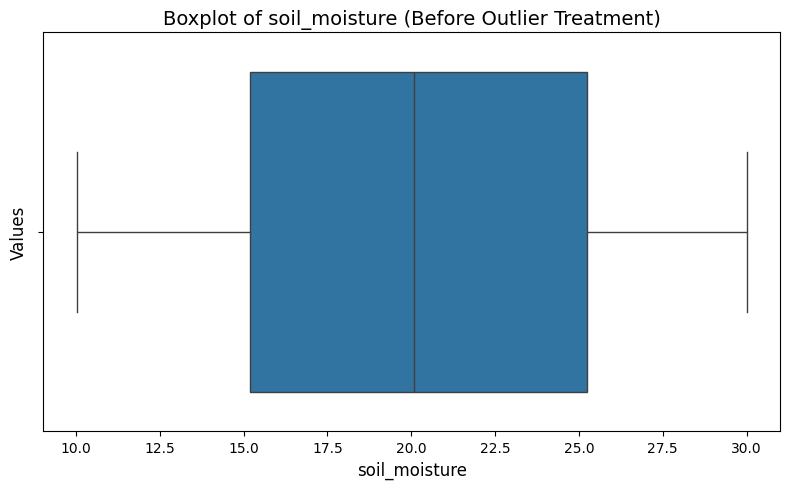

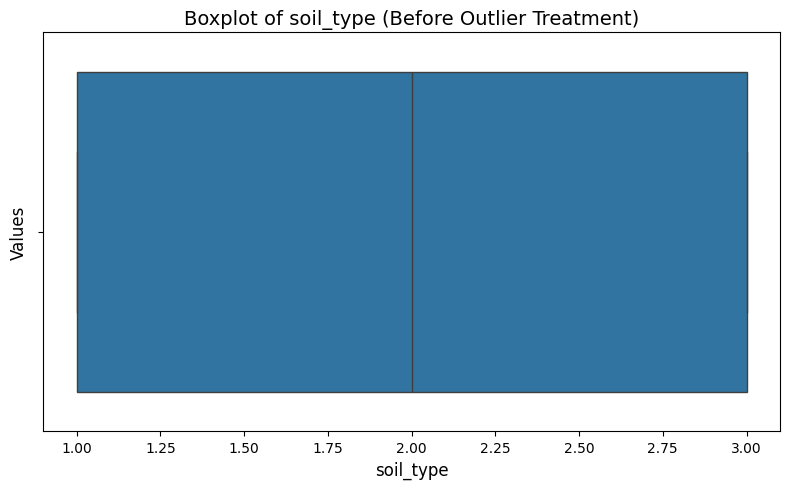

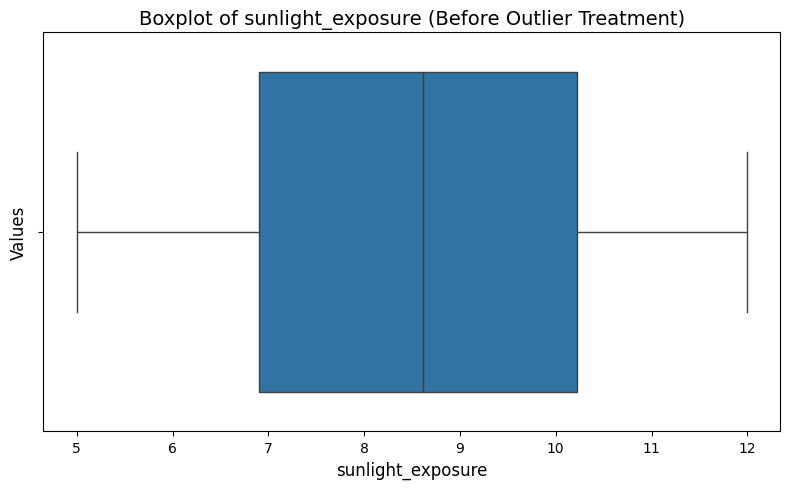

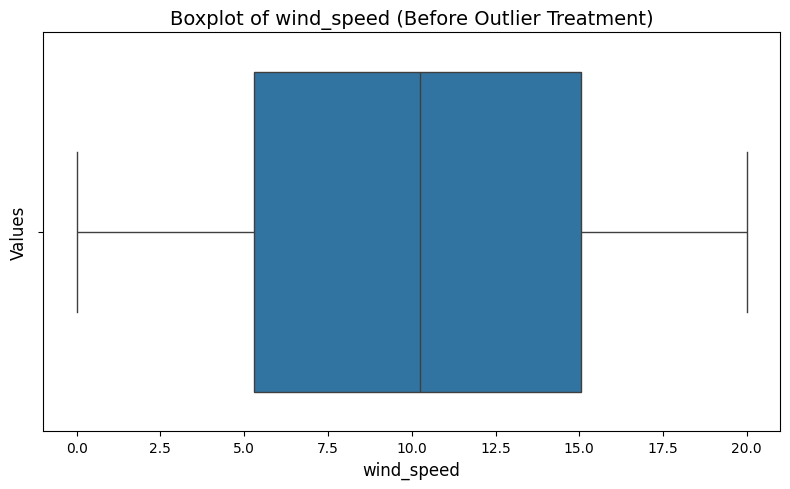

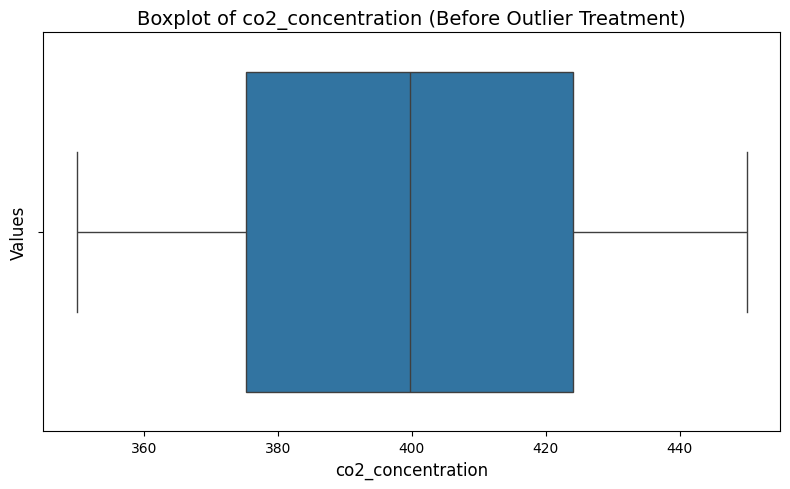

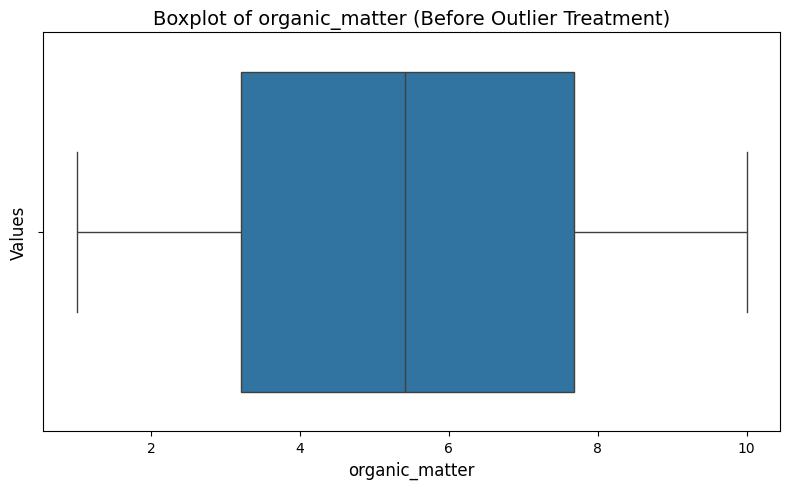

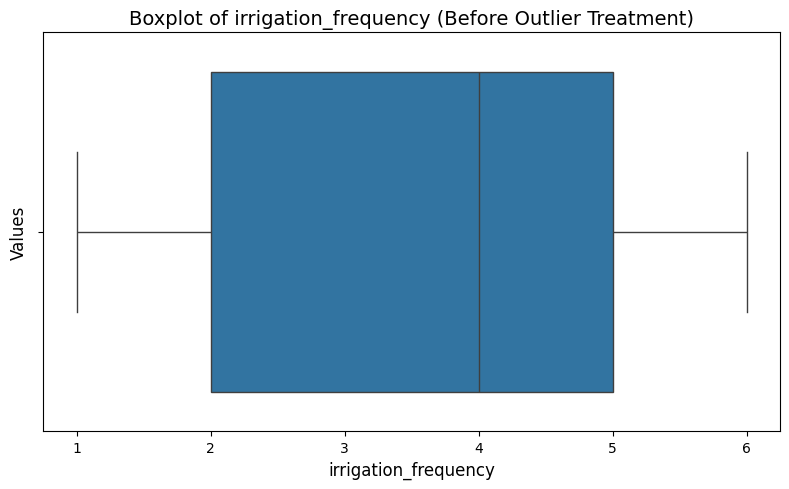

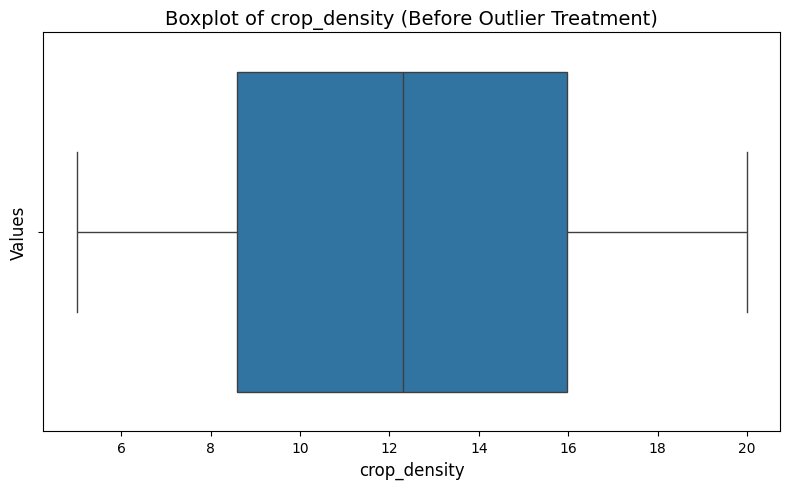

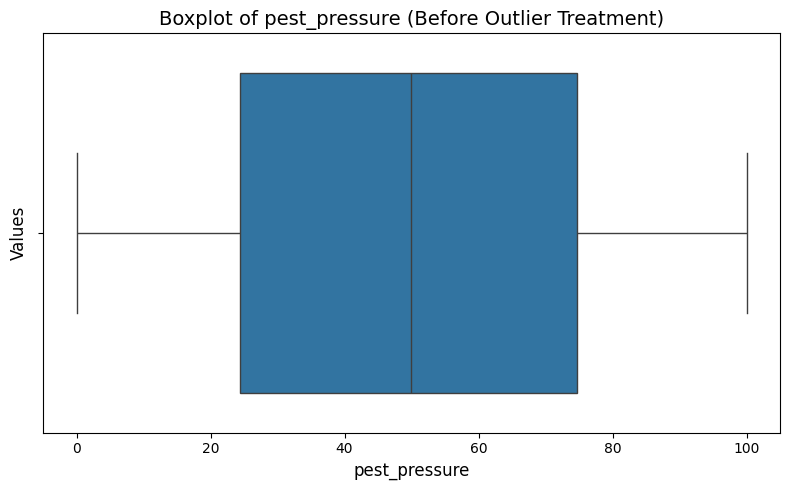

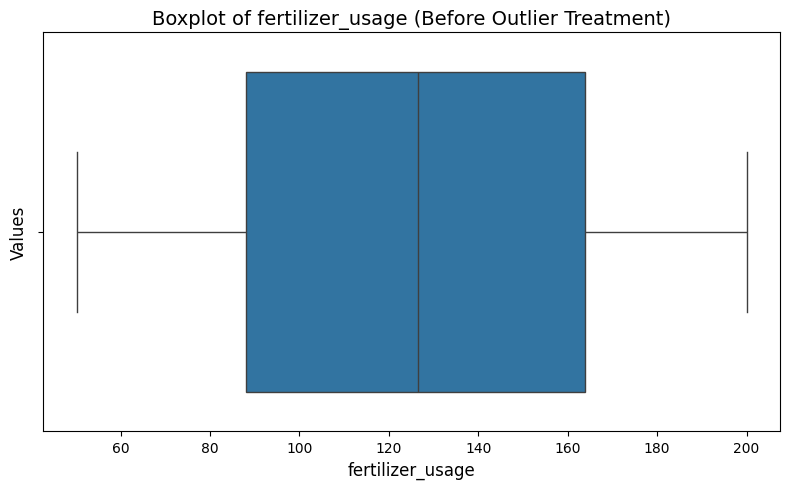

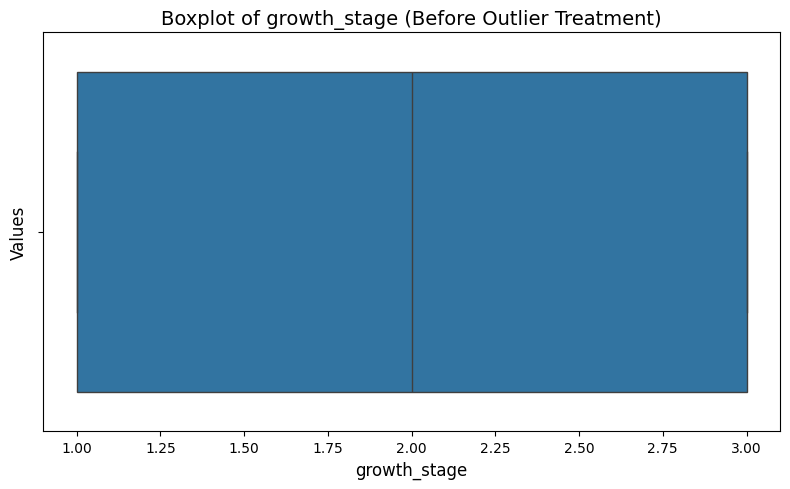

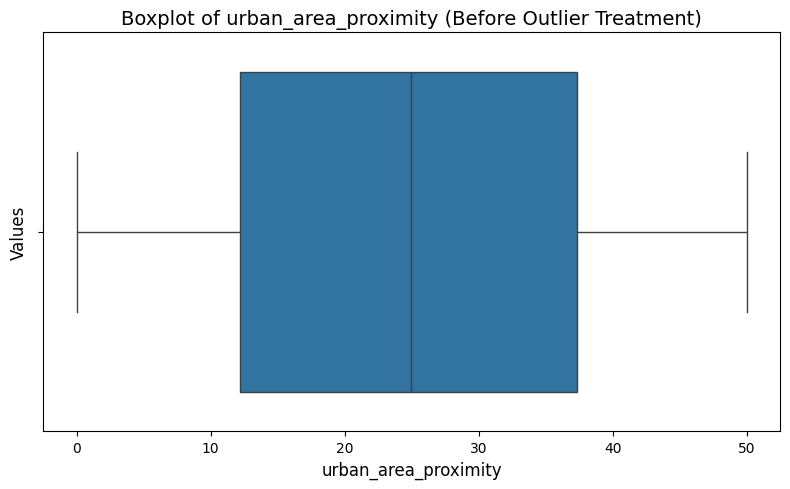

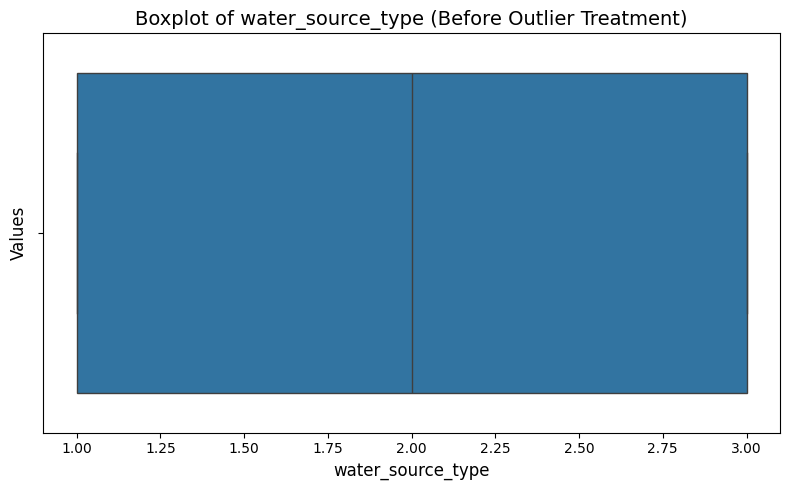

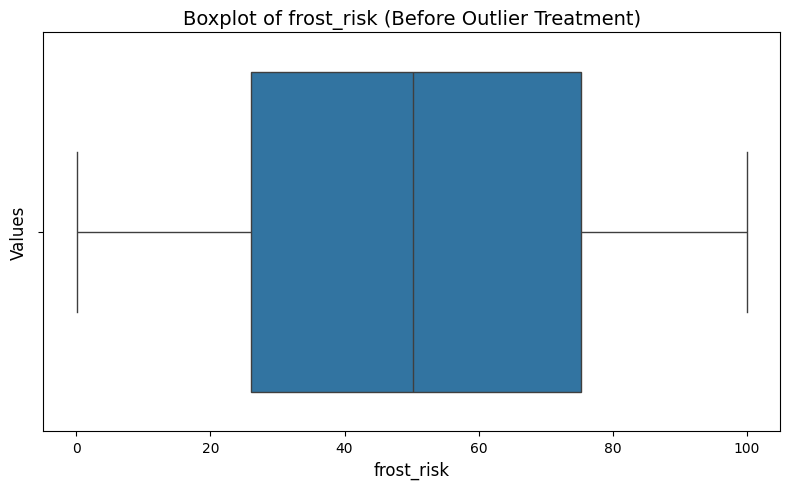

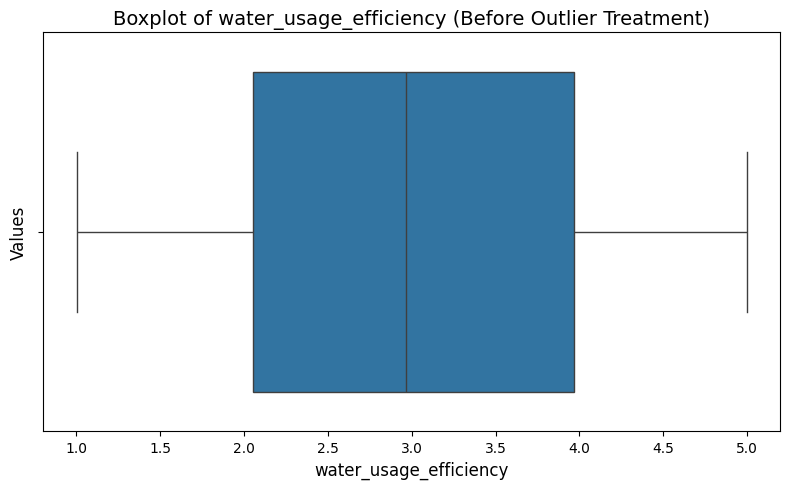

In [16]:
numeric_columns_before = df.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns_before.columns:
    plt.figure(figsize=(8, 5))  # Set figure size for each plot
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of {column} (Before Outlier Treatment)", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

def handle_outliers(df, column, remove_outliers=False):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if remove_outliers:
        # If removing outliers, drop the rows
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        # Clip the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Create a copy of the original DataFrame to clean
data_cleaned = df.copy()

# Handle outliers for each numeric column
for col in numeric_columns:
    data_cleaned = handle_outliers(data_cleaned, col, remove_outliers=False)

# Display the first few rows of the cleaned data
data_cleaned.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41.0,21.770462,80.319644,7.038096,213.841241,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44.0,23.004459,82.320763,7.840207,213.841241,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40.0,26.491096,80.158363,6.980401,213.841241,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42.0,20.130175,81.604873,7.628473,213.841241,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


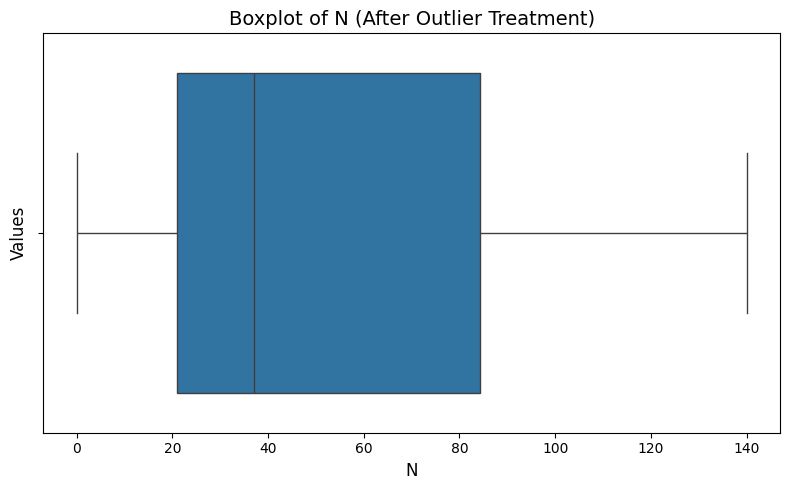

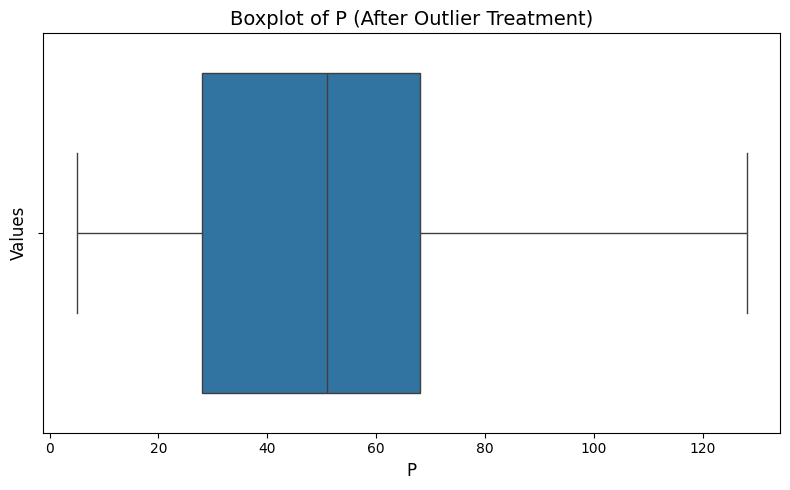

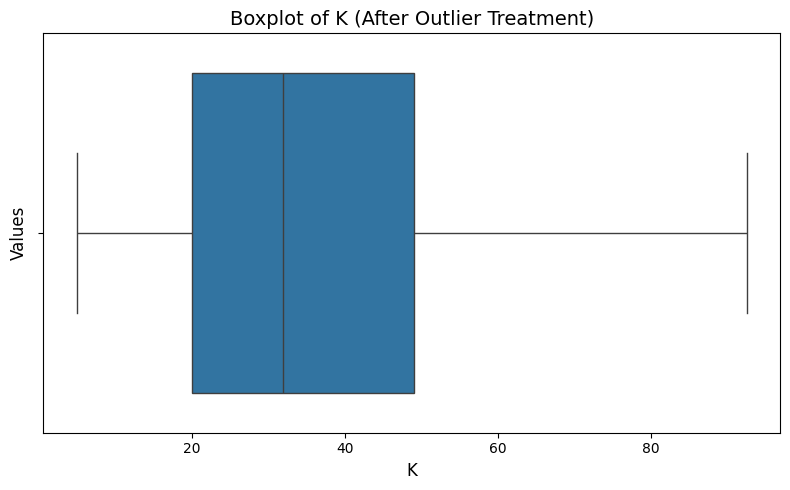

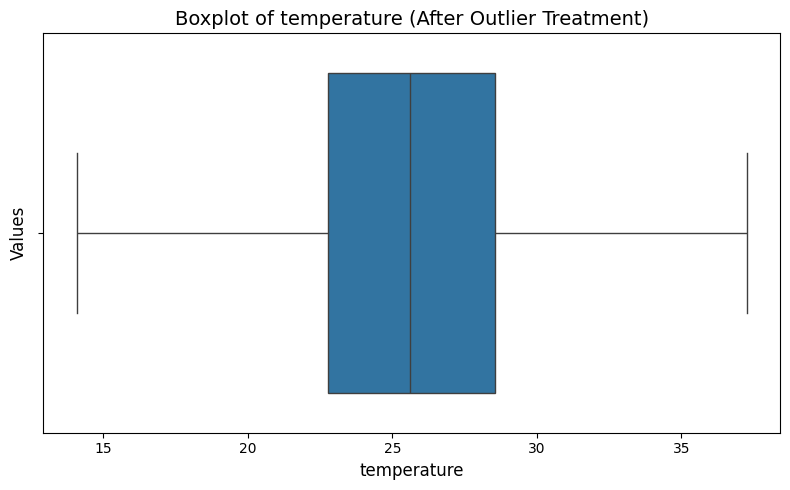

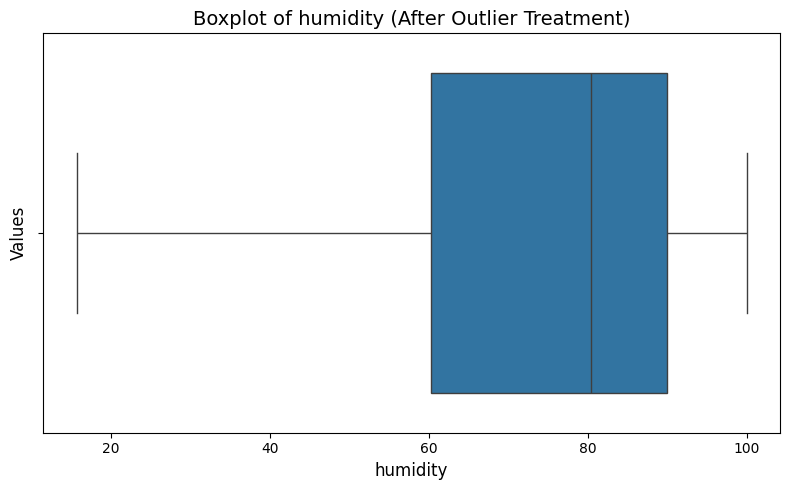

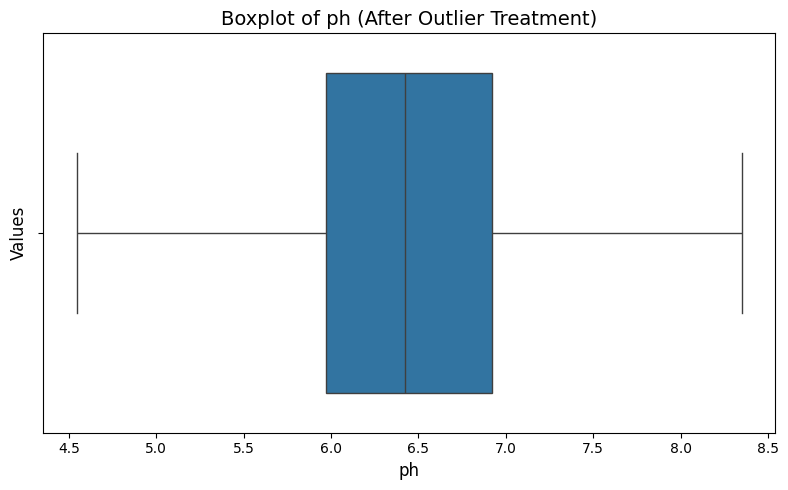

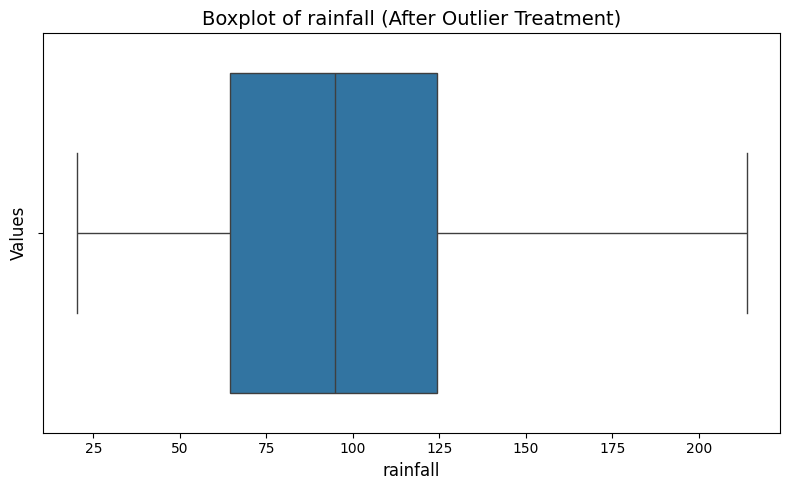

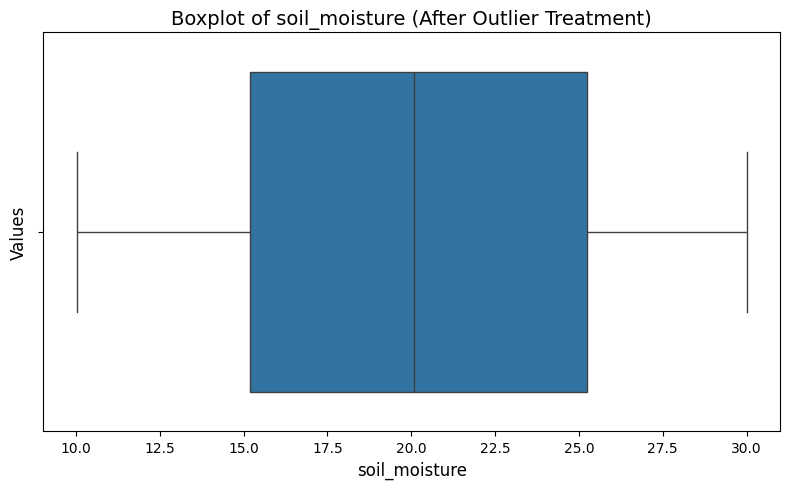

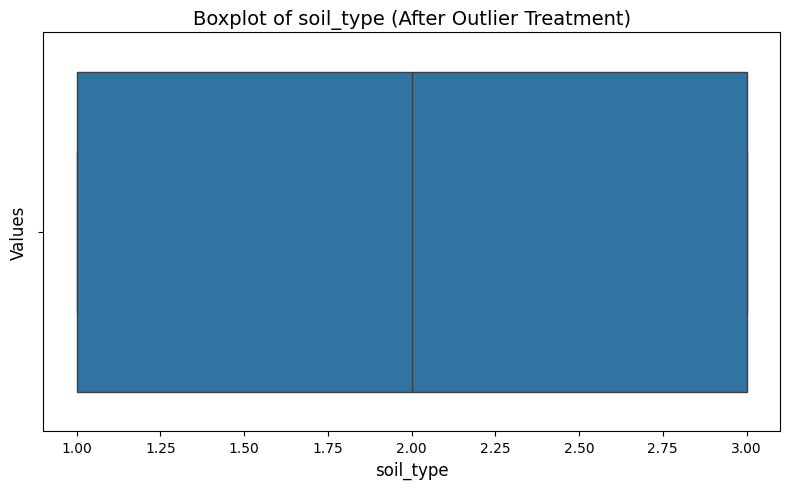

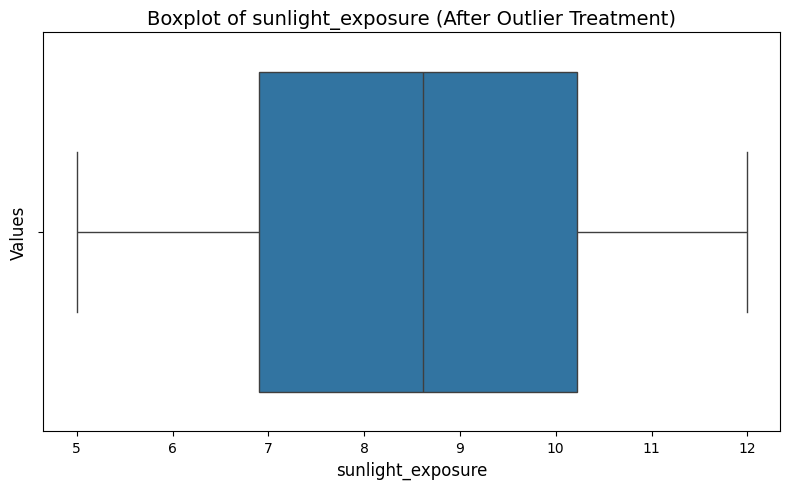

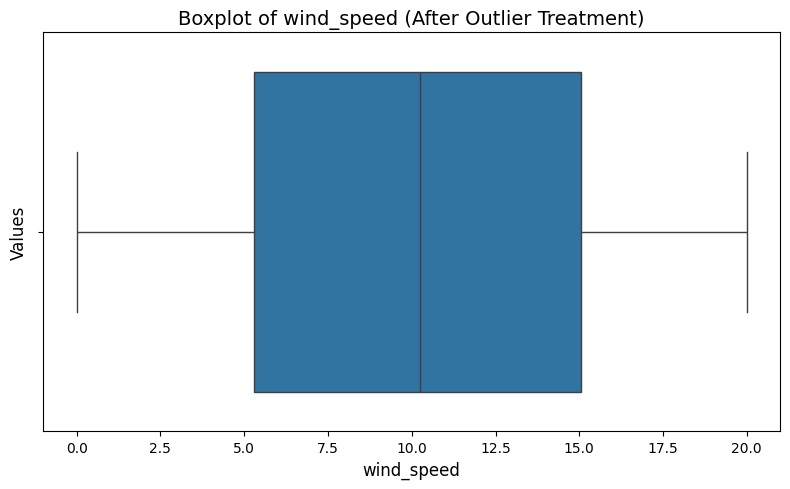

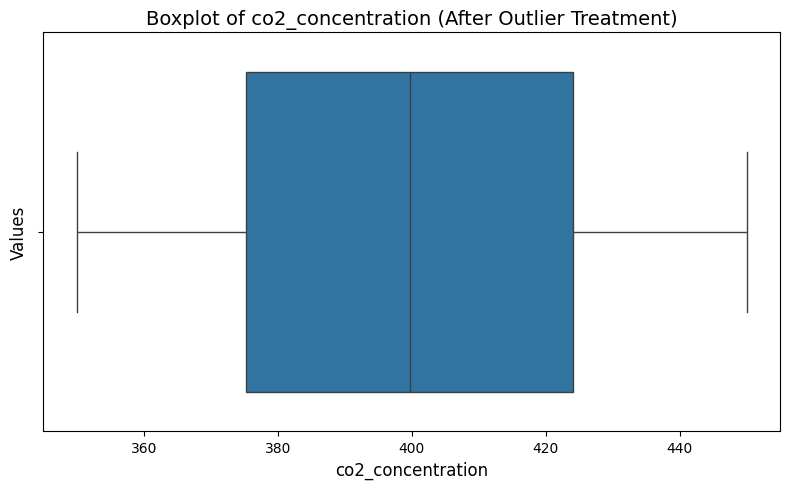

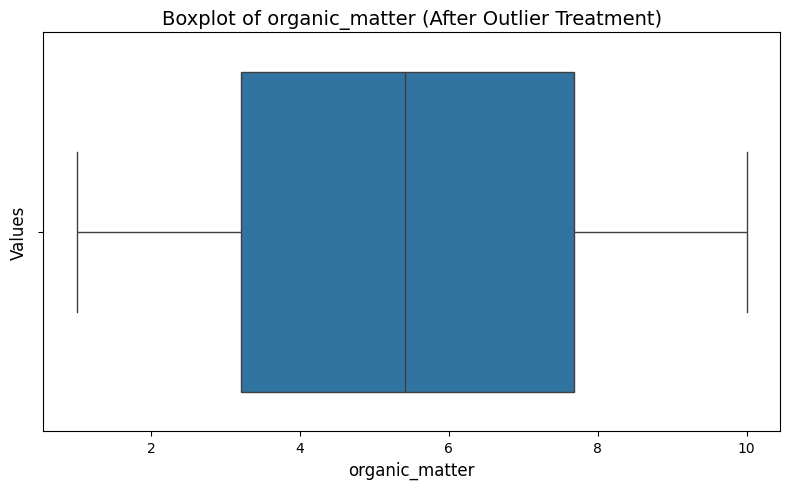

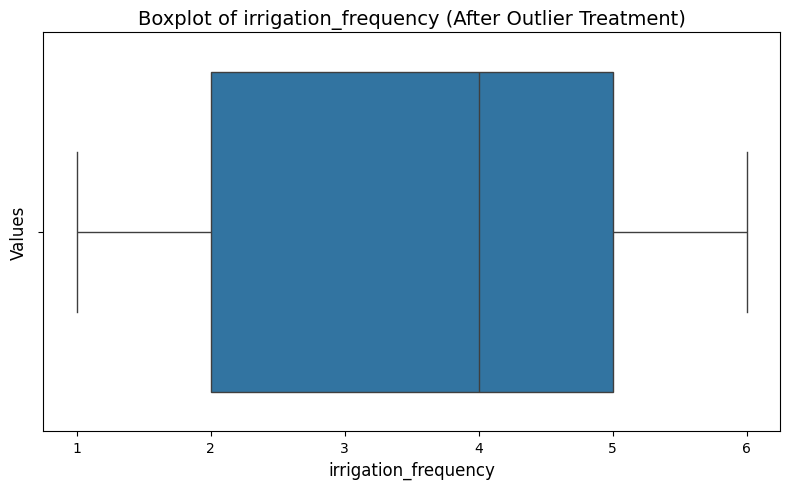

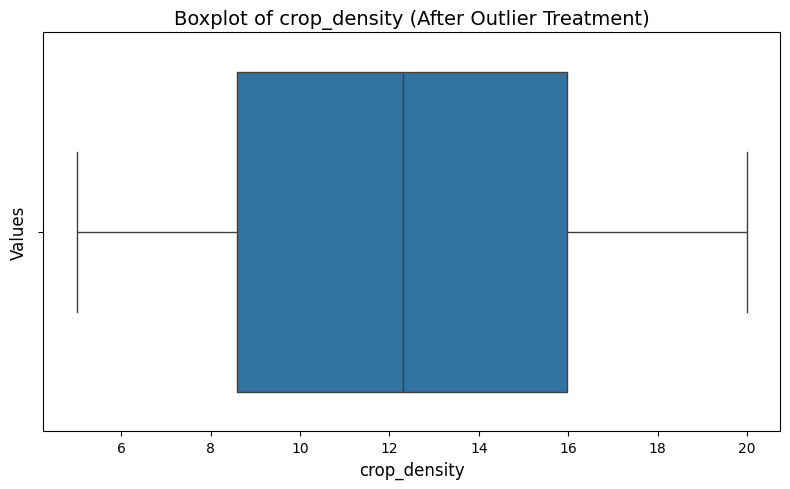

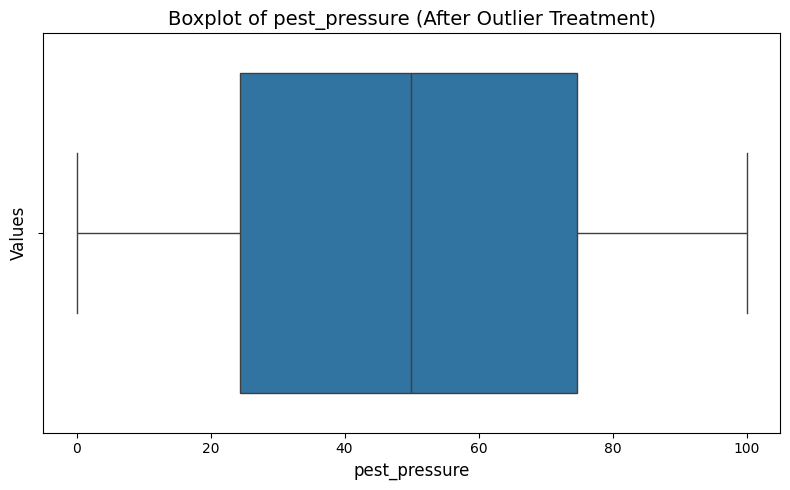

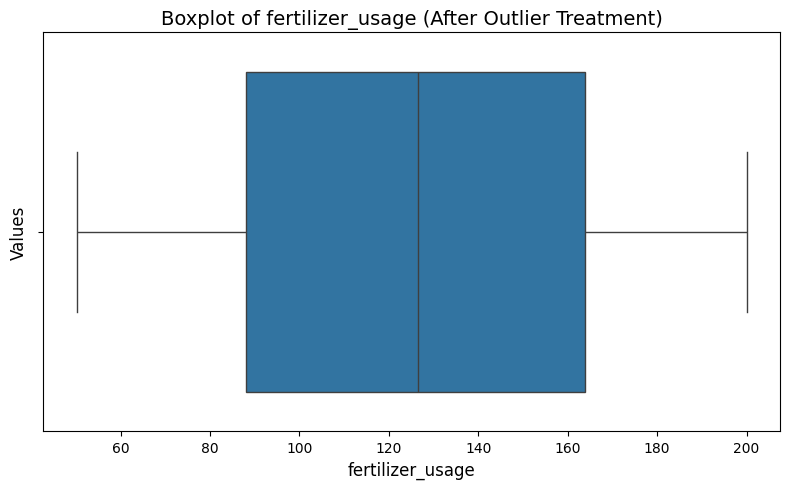

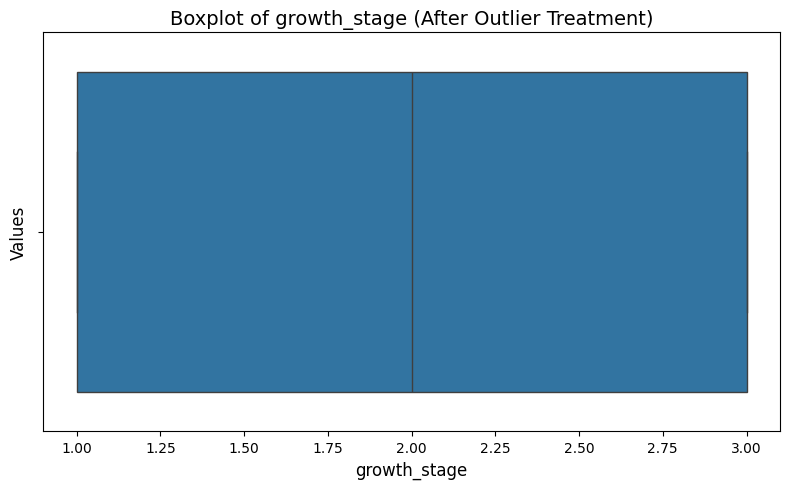

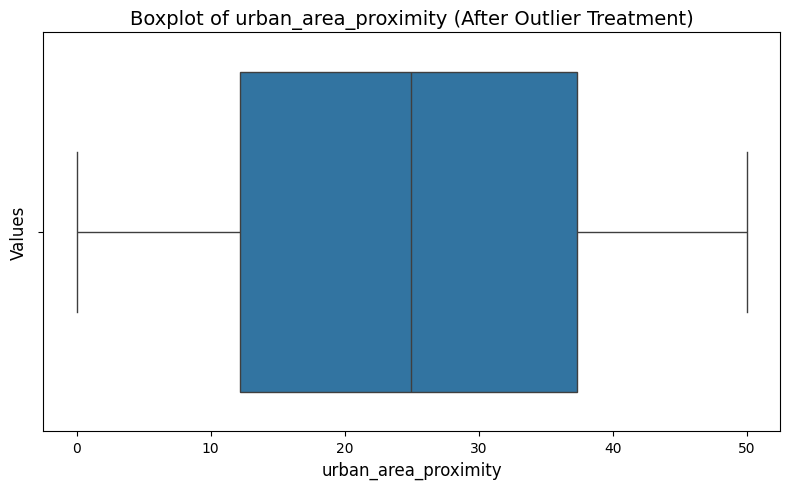

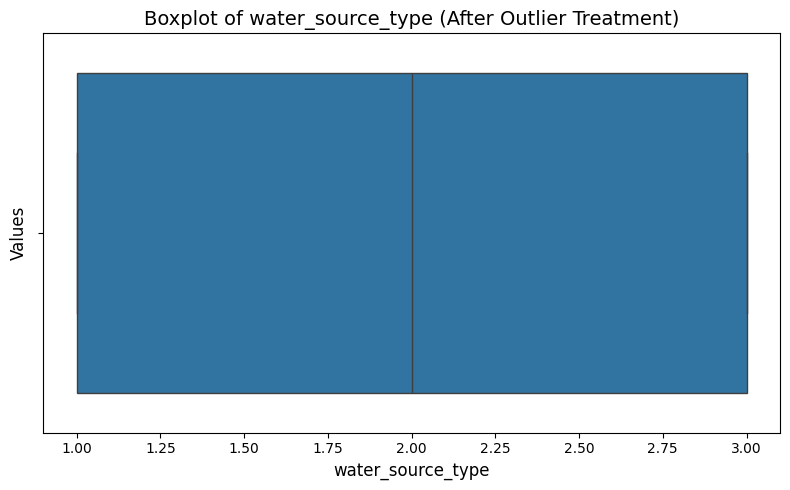

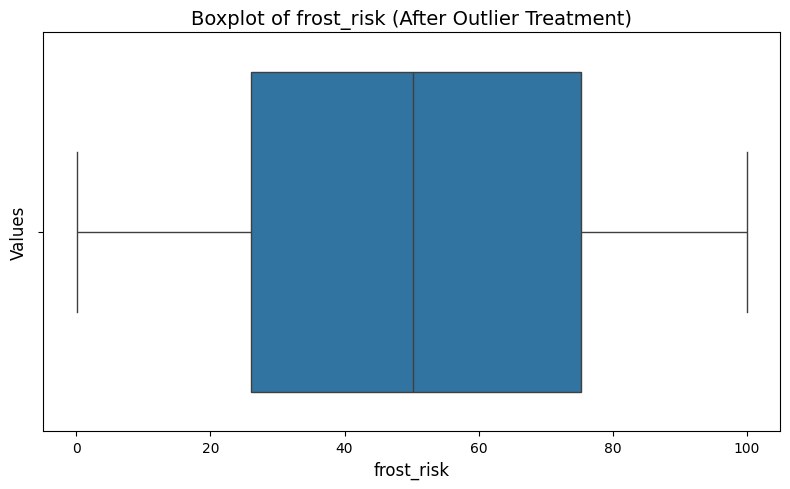

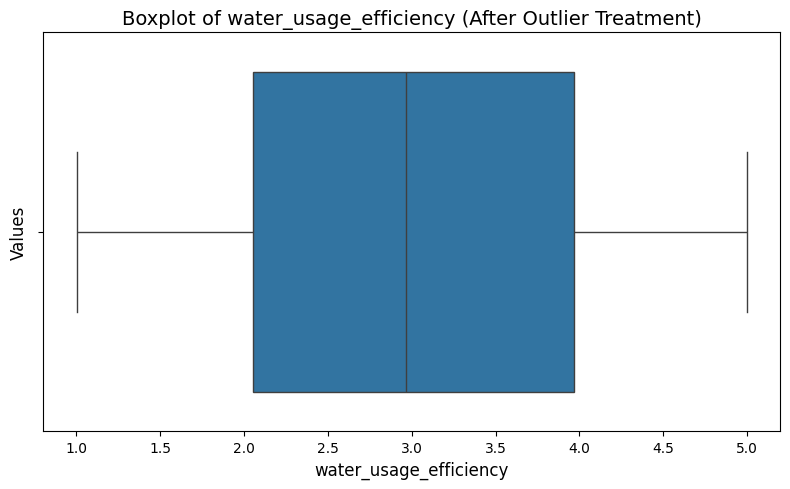

In [18]:
# Ensure 'numeric_columns' reflects the numeric columns in the cleaned dataset
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])



for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))  # Set figure size for each plot
    sns.boxplot(data=data_cleaned, x=column)
    plt.title(f"Boxplot of {column} (After Outlier Treatment)", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


## EDA Continued

In [19]:
print(data_cleaned.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    52.743182    38.376364    25.588740    71.493347   
std      36.917334    31.427156    23.460322     4.738804    22.234536   
min       0.000000     5.000000     5.000000    14.080956    15.731726   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   128.000000    92.500000    37.250073    99.981876   

                ph     rainfall  soil_moisture    soil_type  \
count  2200.000000  2200.000000    2200.000000  2200.000000   
mean      6.464205   101.986465      20.151388     1.991364   
std       0.730288    51.165743       5.793720     0.812263   
min       4.543768    20.211267      10.024260     1.000000   
25%       5.971693

## Feature distributon Plot

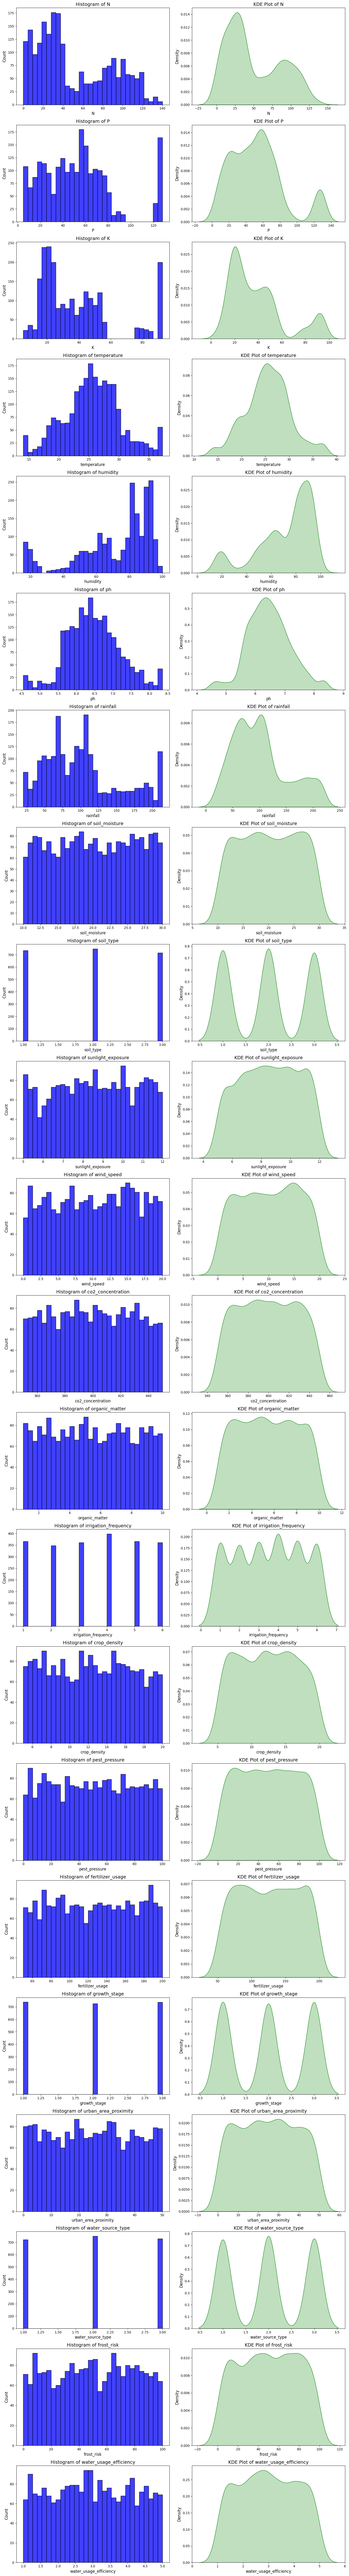

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
 
def plot_feature_distributions(dataframe):
 
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    num_features = len(numeric_columns)
    # Creating subplots
    plt.figure(figsize=(15, num_features * 5))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_features, 2, 2 * (i - 1) + 1)
        sns.histplot(dataframe[column], kde=False, bins=30, color='blue', edgecolor='black')
        plt.title(f'Histogram of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.subplot(num_features, 2, 2 * (i - 1) + 2)
        sns.kdeplot(dataframe[column], fill=True, color='green')
        plt.title(f'KDE Plot of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Density', fontsize=12)
    plt.tight_layout()
    plt.show()
 

plot_feature_distributions(data_cleaned)

## Plot Between Features and Label(Target Variable)

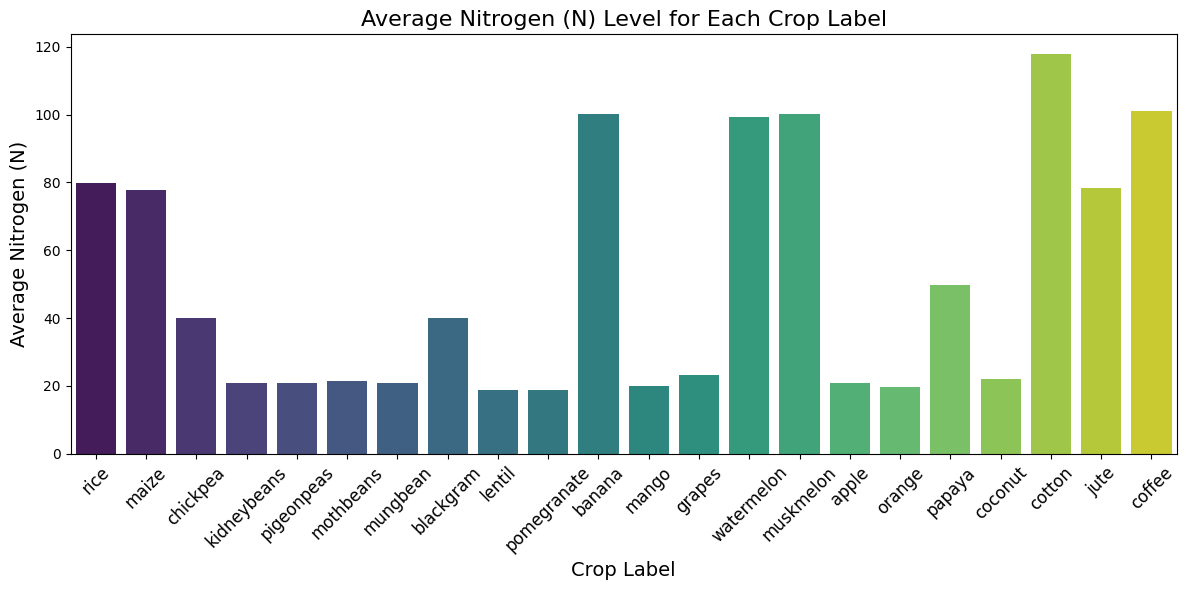

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='N', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average Nitrogen (N) Level for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average Nitrogen (N)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


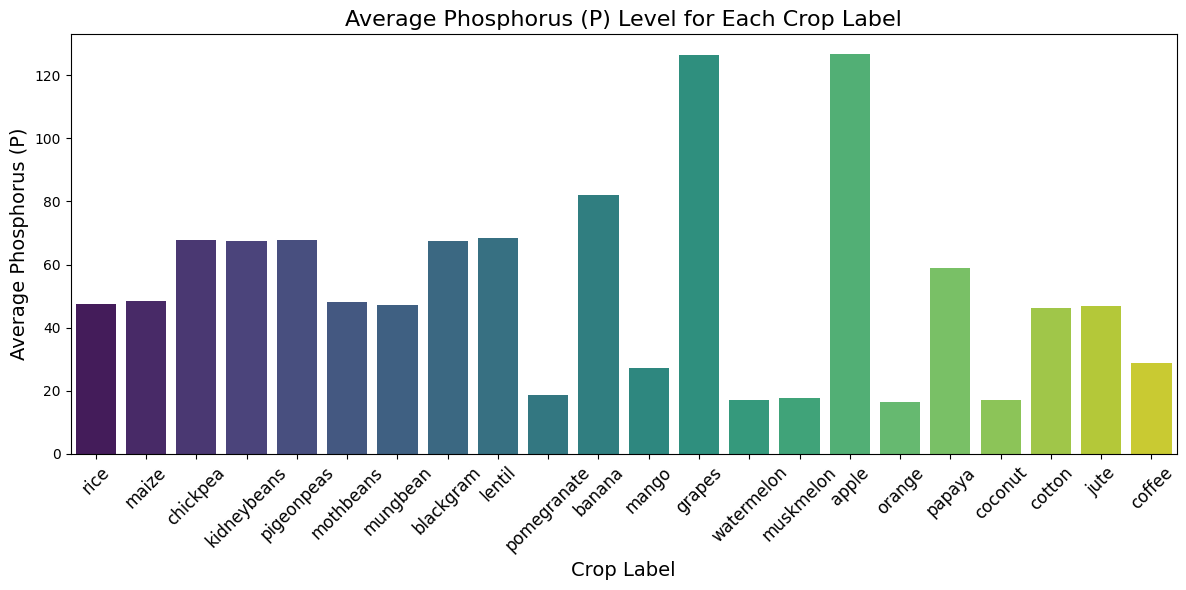

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='P', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average Phosphorus (P) Level for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average Phosphorus (P)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


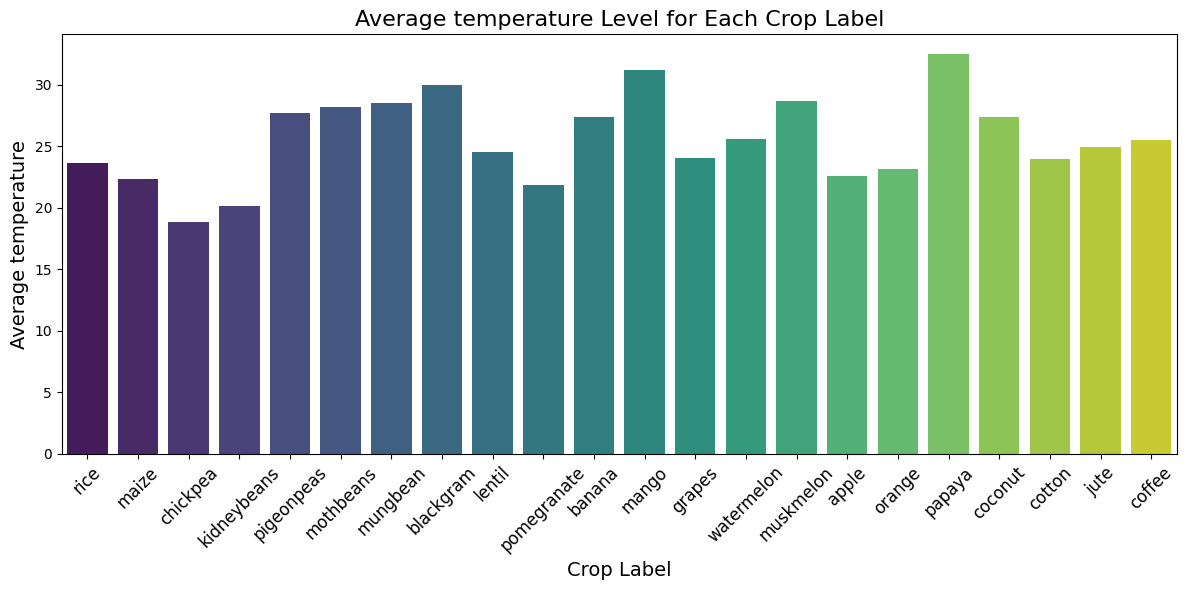

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='temperature', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average temperature Level for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average temperature', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


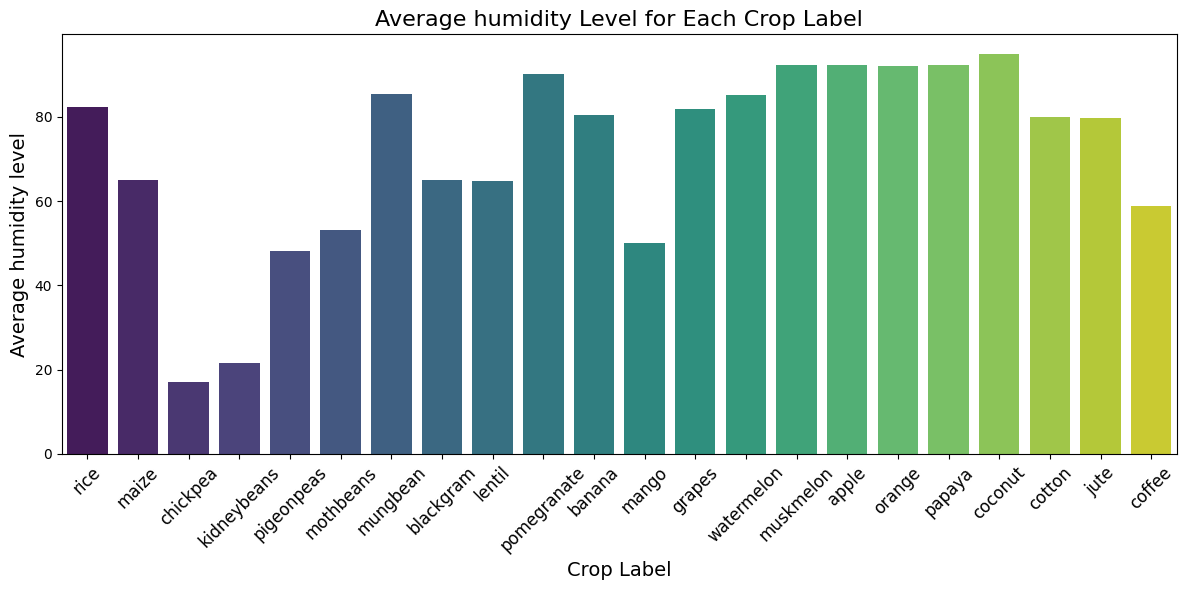

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='humidity', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average humidity Level for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average humidity level', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


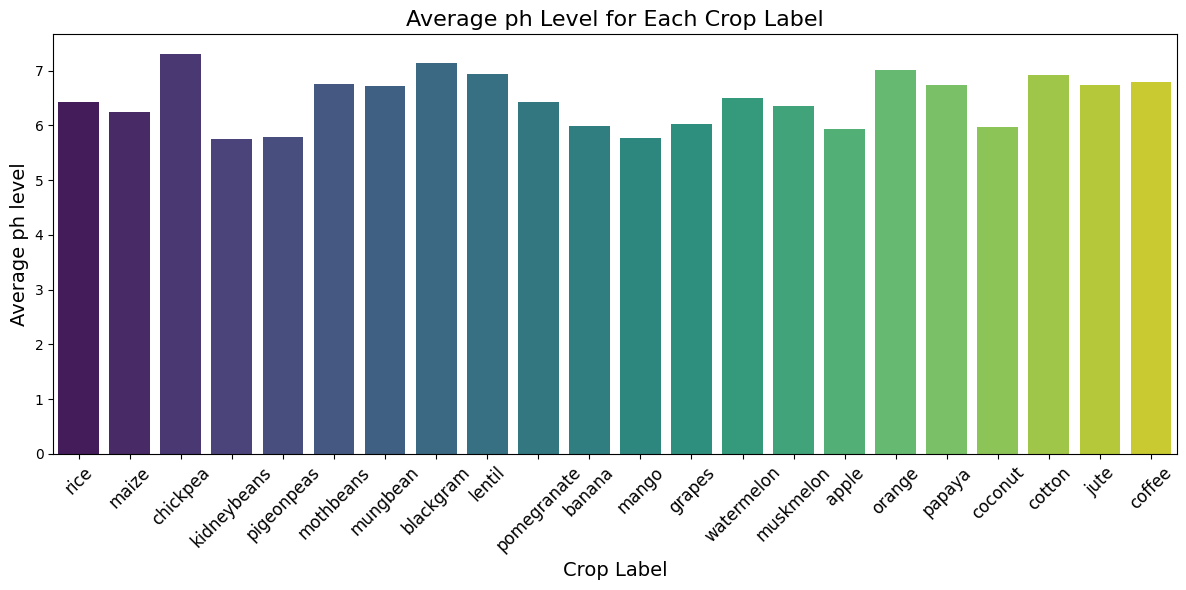

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='ph', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average ph Level for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average ph level', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


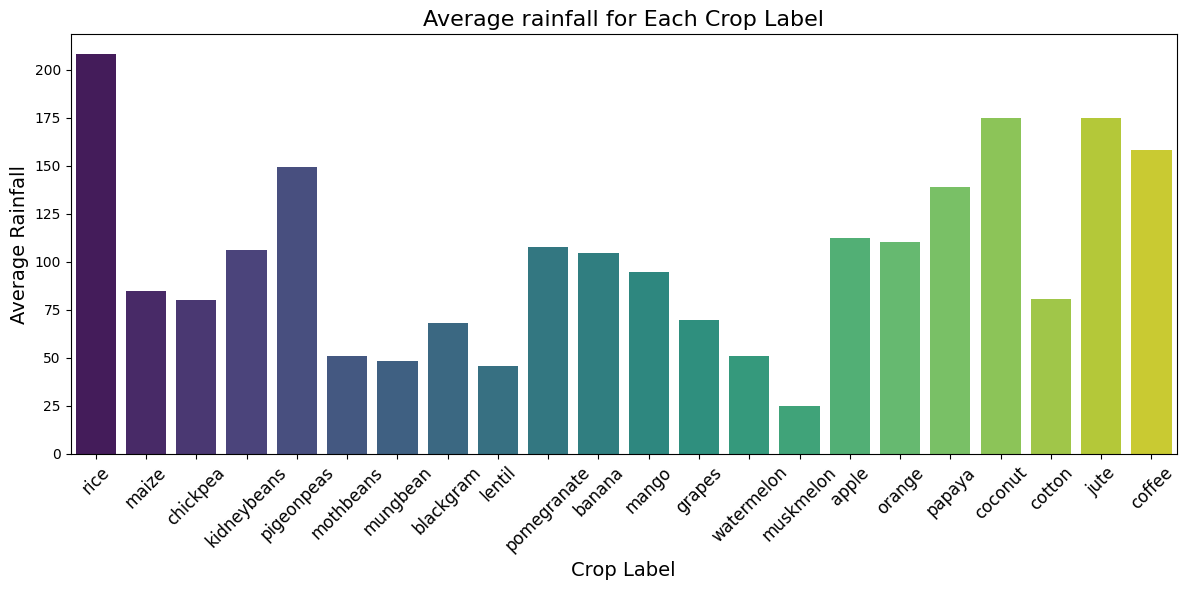

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

# Plot a bar plot to show the mean of 'N' for each 'label'
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='rainfall', data=data_cleaned, ci=None, palette='viridis')

# Customize the plot
plt.title('Average rainfall for Each Crop Label', fontsize=16)
plt.xlabel('Crop Label', fontsize=14)
plt.ylabel('Average Rainfall', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## Correlation Analysis of Features

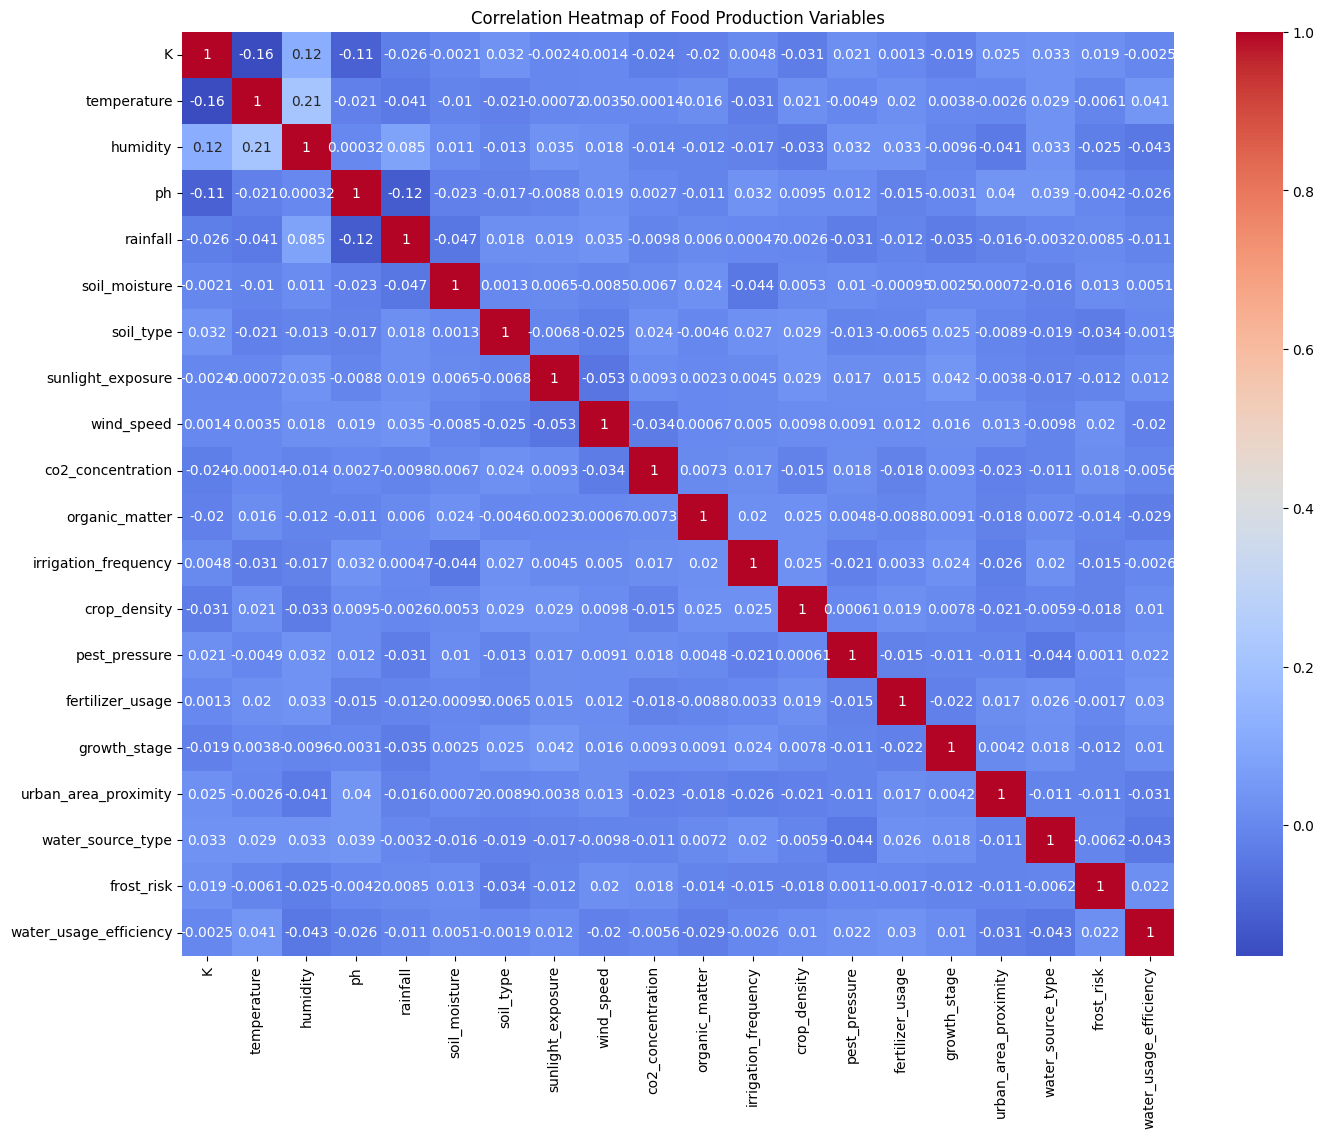

In [27]:
correlation_matrix = data_cleaned.drop(columns = ['label']).iloc[:, 2:].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Food Production Variables')
plt.show()


## STEP5 : Data Preprocessing and Model Training

## LOGISTIC REGRESSION

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

X = data_cleaned.drop('label', axis=1)  # Features (all columns except the target)
y = data_cleaned['label']  # Target variable ('label')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler and LabelEncoder
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Fit and transform the training data using StandardScaler and LabelEncoder
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


LogReg = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', C=0.1)

# Fit the model on the scaled training data
LogReg.fit(X_train_scaled, y_train_encoded)

# Predict the target variable for the test data
predicted_values = LogReg.predict(X_test_scaled)

# Accuracy on the training set (train data)
train_accuracy = metrics.accuracy_score(y_train_encoded, LogReg.predict(X_train_scaled))

# Accuracy on the test set (test data)
test_accuracy = metrics.accuracy_score(y_test_encoded, predicted_values)

# Print accuracies for comparison
print("Logistic Regression Training Accuracy is: ", train_accuracy)
print("Logistic Regression Test Accuracy is: ", test_accuracy)

# Check for overfitting: If there's a large difference, the model might be overfitting
if train_accuracy - test_accuracy > 0.1:  # You can adjust the threshold as per your needs
    print("Warning: Possible Overfitting detected!")
else:
    print("Model is not overfitting.")

# Print the classification report for detailed performance metrics
print(classification_report(y_test_encoded, predicted_values))

# Feature Selection: Identify important features based on coefficients
important_features = np.where(LogReg.coef_ != 0)[1]  # Indices of features with non-zero coefficients
feature_names = X.columns[important_features]  # Get the names of the important features

print("Important features selected by L1 regularization (Lasso):")
print(feature_names)



NameError: name 'data_cleaned' is not defined

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
 
# Train a Random Forest Classifier
RandomForest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42, max_depth=5)
RandomForest.fit(X_train_scaled, y_train_encoded)
 
# Predict the target variable for the test data
rf_predicted_values = RandomForest.predict(X_test_scaled)
 
# Calculate accuracies
train_accuracy = accuracy_score(y_train_encoded, RandomForest.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test_encoded, rf_predicted_values)
 
# Print accuracies for comparison
print("Random Forest Training Accuracy is: ", train_accuracy)
print("Random Forest Test Accuracy is: ", test_accuracy)
 
# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Adjust threshold as needed
    print("Warning: Possible Overfitting detected!")
else:
    print("Model is not overfitting.")
 
# Print the classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_encoded, rf_predicted_values))
 
# Feature Importance: Identify important features based on the Random Forest
feature_importances = RandomForest.feature_importances_  # Importance values
important_features_indices = np.where(feature_importances > 0)[0]  # Indices of features with importance > 0
important_features_names = X.columns[important_features_indices]  # Names of the important features
 
# Print important features
print("\nImportant features selected by the Random Forest:")
for name, importance in zip(important_features_names, feature_importances[important_features_indices]):
    print(f"{name}: {importance:.4f}")

Random Forest Training Accuracy is:  0.9903409090909091
Random Forest Test Accuracy is:  0.9818181818181818
Model is not overfitting.

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.79      0.88        24
          14   

## Support Vector Machine

In [35]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

# Train a Linear SVM model
SVM = LinearSVC(random_state=42, penalty='l1', dual=False, C=0.1)  # L1 regularization for feature selection
SVM.fit(X_train_scaled, y_train_encoded)

# Predict the target variable for the test data
svm_predicted_values = SVM.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_encoded, SVM.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test_encoded, svm_predicted_values)

# Print accuracies for comparison
print("SVM Training Accuracy is: ", train_accuracy)
print("SVM Test Accuracy is: ", test_accuracy)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Adjust threshold as needed
    print("Warning: Possible Overfitting detected!")
else:
    print("Model is not overfitting.")

# Print the classification report
print("\nClassification Report (SVM):")
print(classification_report(y_test_encoded, svm_predicted_values))

# Feature Importance: Identify important features based on coefficients
important_features_indices = np.where(SVM.coef_[0] != 0)[0]  # Indices of features with non-zero coefficients
important_features_names = X.columns[important_features_indices]  # Names of the important features

# Print important features
print("\nImportant features selected by SVM:")
for name, coef in zip(important_features_names, SVM.coef_[0][important_features_indices]):
    print(f"{name}: {coef:.4f}")





SVM Training Accuracy is:  0.9568181818181818
SVM Test Accuracy is:  0.9204545454545454
Model is not overfitting.

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.90      0.92        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.85      1.00      0.92        17
           6       0.68      1.00      0.81        17
           7       1.00      1.00      1.00        14
           8       0.93      0.61      0.74        23
           9       0.91      1.00      0.95        20
          10       0.77      0.91      0.83        11
          11       0.93      0.62      0.74        21
          12       0.86      1.00      0.93        19
          13       0.95      0.79      0.86        24
          14       0.90      1.00      0.95  

## XGBoost

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, learning_rate=0.05, n_estimators=50, max_depth=2,reg_alpha=0.1,reg_lambda=1.0)
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict the target variable for the test data
xgb_predicted_values = xgb_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train_encoded, xgb_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test_encoded, xgb_predicted_values)

# Print accuracies for comparison
print("XGBoost Training Accuracy is: ", train_accuracy)
print("XGBoost Test Accuracy is: ", test_accuracy)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Adjust threshold as needed
    print("Warning: Possible Overfitting detected!")
else:
    print("Model is not overfitting.")

# Print the classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_encoded, xgb_predicted_values))

# Feature Importance: Identify important features
feature_importances = xgb_model.feature_importances_
important_features_indices = np.where(feature_importances > 0.01)[0]  # Adjust threshold as needed
important_features_names = X.columns[important_features_indices]  # Names of the important features

# Print important features
print("\nImportant features selected by XGBoost:")
for name, importance in zip(important_features_names, feature_importances[important_features_indices]):
    print(f"{name}: {importance:.4f}")


XGBoost Training Accuracy is:  0.9948863636363636
XGBoost Test Accuracy is:  0.9727272727272728
Model is not overfitting.

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      1.00      0.92        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.79      0.88        24
          14       1.00      1.00

In [37]:
data_cleaned.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed',
       'co2_concentration', 'organic_matter', 'irrigation_frequency',
       'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage',
       'urban_area_proximity', 'water_source_type', 'frost_risk',
       'water_usage_efficiency'],
      dtype='object')

In [39]:
y_test_encoded = y_test_encoded.astype(int)
predicted_values = predicted_values.astype(int)


## True label and Predicted label

In [40]:
results = pd.DataFrame({'True Label': y_test, 'Predicted Label': predicted_values})

# Save to CSV
results.to_csv('results.csv', index=False)

# Print a confirmation message
print("Results saved to 'results.csv'")

# Optionally, display the first few rows of the DataFrame
print(results.head())


Results saved to 'results.csv'
      True Label  Predicted Label
1451   muskmelon               15
1334  watermelon               21
1761      papaya               17
1735      papaya               17
1576       apple                0


## Pie chart for label distribution

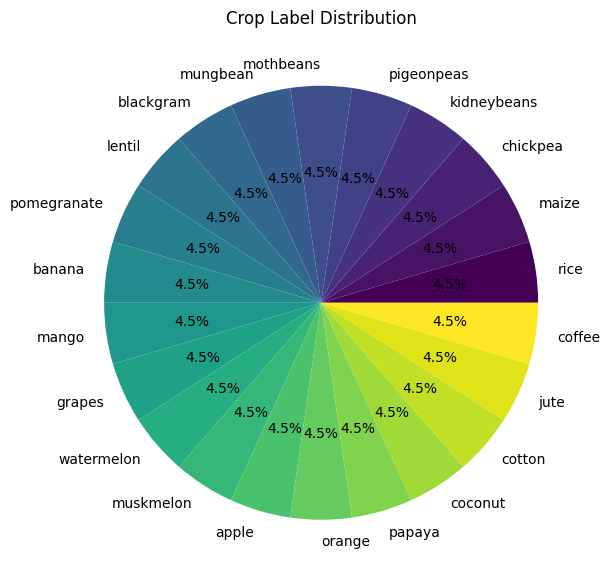

In [41]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,8), cmap='viridis')
plt.title('Crop Label Distribution')
plt.ylabel('')  # Optional: remove y-axis label
plt.show()


## Comparision of Model Accuracies

In [47]:
model = []
acc = []

# Random Forest
model.append('Random Forest')
acc.append(test_accuracy)  # Add Random Forest test accuracy


# XGBoost
xgb_test_accuracy = accuracy_score(y_test_encoded, xgb_predicted_values)  
model.append('XGBoost')
acc.append(xgb_test_accuracy)

# SVM
svm_test_accuracy = accuracy_score(y_test_encoded, svm_predicted_values)  
model.append('SVM')
acc.append(svm_test_accuracy)

# Logistic Regression
logreg_test_accuracy = accuracy_score(y_test_encoded, predicted_values)  
model.append('Logistic Regression')
acc.append(logreg_test_accuracy)



# Create the DataFrame
model_comparison = pd.DataFrame({'Model': model, 'Accuracy': acc})

# Print the model comparison
print(model_comparison)


                 Model  Accuracy
0        Random Forest  0.981818
1              XGBoost  0.972727
2                  SVM  0.920455
3  Logistic Regression  0.895455
